### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import utils
import plotly.graph_objs as go
import dash
from dash import dcc
from dash import html
import plots
from dash.dependencies import Input, Output
from dateutil import parser
%load_ext autoreload
%autoreload 2

### Parsing the Columns

In [27]:
name = 'travel'
bottom_channels = pd.read_csv(f"./{name}/bottom_{name}_vid.csv", index_col = 0)
bottom_channels = utils.parse_cols(bottom_channels)


top_channels = pd.read_csv(f"./{name}/top_{name}_vid.csv", index_col = 0)
top_channels = utils.parse_cols(top_channels)
# Autos: all 3 reject the null hypothesis
# Shows: 1st only reject, reason being few of the channels have 0 mean.
# Travel: 2 reject, last not rejected

Parser dropped 0 rows
Parser dropped 0 rows


### Describing the Data

In [28]:
# print(top_channels.describe(percentiles = [.25, .5, .75, .9, .95, .99]))
# print(bottom_channels.describe(percentiles = [.25, .5, .75, .9, .95, .99]))

### Adding the popularity Column and combining the popular and unpopular dataframes

In [29]:
bottom_channels = utils.add_pop_unpop_col(bottom_channels, False)
top_channels = utils.add_pop_unpop_col(top_channels, True)

In [30]:
comb_vids = utils.combine_pop_unpop_df(top_channels, bottom_channels)

In [31]:
# comb_vids

### Removing the Outliers of the Data

In [32]:
# Remove outliers from the dataframe
cleaned_dataframe = utils.remove_outliers(comb_vids)
print(comb_vids.shape, cleaned_dataframe.shape)

(10822, 21) (9892, 21)


### Splitting the columns into 2 Chunks each having popular and unpopular channels on the base of mean of views

In [33]:
# chunklow_ch_names, chunkhigh_ch_names = utils.split_and_merge_by_views(comb_autos_info)
# chunklow_ch_names.channelName.tolist(), chunkhigh_ch_names.channelName.tolist()

In [34]:
summed_views_df, mean_views_popular, mean_views_unpopular, popular_below_mean, popular_above_mean, unpopular_below_mean, unpopular_above_mean = utils.pop_unpop_chunks(cleaned_dataframe)

above_mean_chunk = popular_above_mean + unpopular_above_mean
below_mean_chunk = popular_below_mean + unpopular_below_mean


print("Mean views of popular channels: ", mean_views_popular)
print("Mean views of unpopular channels: ", mean_views_unpopular)

print(f"Popular channel names with views above mean: {(popular_above_mean)}")
print(f"Popular channel names with views below mean: {(popular_below_mean)}")
print(f"UnPopular channel names with views above mean: {(unpopular_above_mean)}")
print(f"UnPopular channel names with views above mean: {(unpopular_below_mean)}")

Mean views of popular channels:  282338441.9
Mean views of unpopular channels:  40975686.9
Popular channel names with views above mean: ['Kara and Nate', 'Peter Santenello', 'alanxelmundo', 'bald and bankrupt']
Popular channel names with views below mean: ['Amazing Places on Our Planet', 'Happy Channel', 'Indian Desi Traveller', 'MoranDays', 'Mundo Sem Fim', 'Wolters World']
UnPopular channel names with views above mean: ['Avi vlogz', 'Gaston Marotta', 'Jacek Zarzycki', 'Sin Postal', 'Theme Park Worldwide', 'WanderDa', 'wocomoTRAVEL']
UnPopular channel names with views above mean: ['Aika Agustin', 'Google Local Guides', 'Travel with AK']


In [35]:
# # Run the first App to see the growth of views over the years for above mean chunk
# app = plots.dynamic_view_plots(cleaned_dataframe)
# app.run_server(debug=True, use_reloader=False, mode="inline", port=23000)

In [36]:
# percentiles = ['.25', '.5', '.75', '.9', '.95', '.99']
# app_2 = plots.percentiles_plot(cleaned_dataframe, percentiles=percentiles)
# app_2.run_server(debug=True, use_reloader=False, mode="inline", port=23001)

/home/yuvi_dh/downloads/installed/miniconda3/envs/data_analysis_env/lib/python3.11/site-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


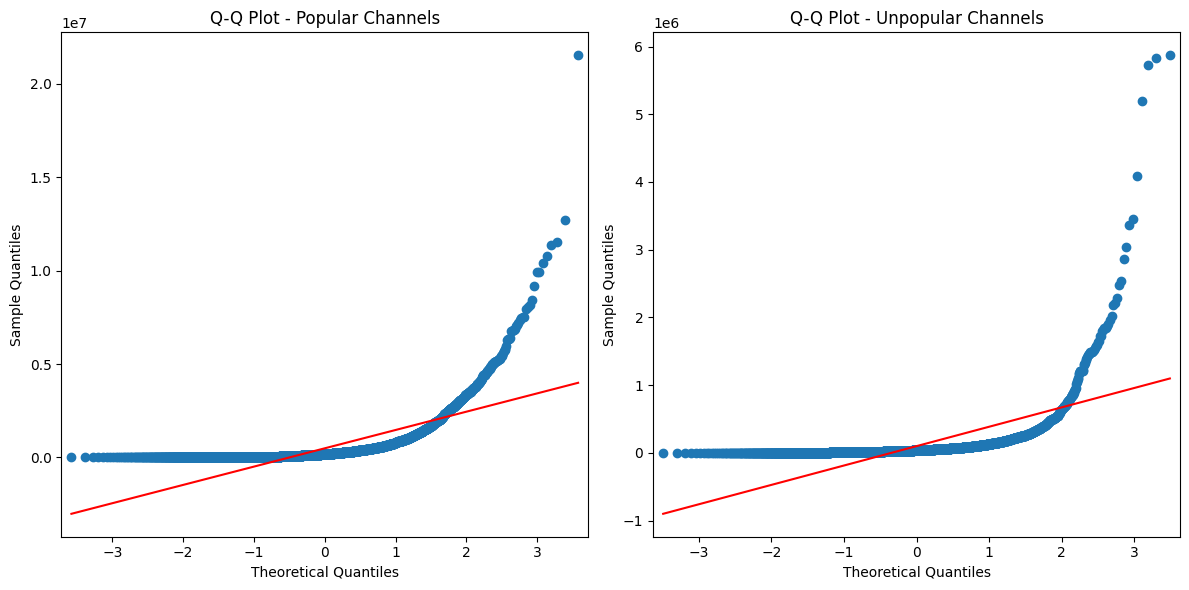

In [37]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import pandas as pd
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu

df = cleaned_dataframe
# recent_years = df['publishingYear'].isin([2023, 2022,2021])
# df = df[recent_years]

# Assuming your DataFrame is named 'df'
# Separate data for popular and unpopular channels
popular_views = df[df['pop_unpop'] == 1]['viewCount']
unpopular_views = df[df['pop_unpop'] == 0]['viewCount']

# Create Q-Q plots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

sm.qqplot(popular_views, line='s', color='blue', ax=axs[0])
axs[0].set_title('Q-Q Plot - Popular Channels')

sm.qqplot(unpopular_views, line='s', color='orange', ax=axs[1])
axs[1].set_title('Q-Q Plot - Unpopular Channels')

plt.tight_layout()
plt.show()

In [38]:
# Assuming your DataFrame is named 'df'
# Filter data for the most recent three years
df = cleaned_dataframe
recent_years = df['publishingYear'].isin([2023, 2022,2021])  # Replace 'year1', 'year2', 'year3' with actual years
filtered_df = df[recent_years]

# Separate data for popular and unpopular channels in the recent years
popular = filtered_df[filtered_df['pop_unpop'] == 1]['viewCount']
unpopular = filtered_df[filtered_df['pop_unpop'] == 0]['viewCount']

# Perform two-tailed t-test
t_statistic, p_value = mannwhitneyu(popular, unpopular)

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05  # Set your significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the view counts of popular and unpopular channels in the recent three years.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the view counts of popular and unpopular channels in the recent three years.")


T-statistic: 4142144.5
P-value: 3.770435806578467e-103
Reject the null hypothesis: There is a significant difference between the view counts of popular and unpopular channels in the recent three years.


In [41]:
# Assuming your DataFrame is named 'cleaned_dataframe'
# Filter data for the most recent three years
df = cleaned_dataframe
# recent_years = df['publishingYear']
# df = df[recent_years]

popular_df = df[df['pop_unpop']==1]
unpopular_df = df[df['pop_unpop']==0]

# Group by channelTitle and calculate the mean view count for each channel
popular_mean_view = popular_df.groupby('channelTitle')['viewCount'].mean().reset_index()
popular_mean_view['pop_unpop'] = 1
unpopular_mean_view = unpopular_df.groupby('channelTitle')['viewCount'].mean().reset_index()
unpopular_mean_view['pop_unpop'] = 0

# Get the view Count
popular = popular_mean_view['viewCount']
unpopular = unpopular_mean_view['viewCount']

# Perform two-tailed t-test
t_statistic, p_value = mannwhitneyu(popular, unpopular)

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Interpret the results
alpha = 0.01  # Set your significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the mean view counts of popular and unpopular channels.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the mean view counts of popular and unpopular channels.")

T-statistic: 86.0
P-value: 0.00728455700947966
Reject the null hypothesis: There is a significant difference between the mean view counts of popular and unpopular channels.


In [10]:
means = utils.return_means_from_percentiles_for_given_years(cleaned_dataframe, percentiles=['0.95'], years = [2023, 2022, 2021], column = 'viewCount', year_column='publishingYear')

In [18]:
df = means
# Assuming your DataFrame is named 'df'
# Separate data for popular and unpopular channels
popular = df[df['pop_unpop'] == 1]['ViewMean'].iloc[:9]
unpopular = df[df['pop_unpop'] == 0]['ViewMean'].iloc[:9]

# Perform two-tailed t-test
t_statistic, p_value = mannwhitneyu(popular, unpopular)

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05  # Set your significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the mean views of popular and unpopular channels.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the mean views of popular and unpopular channels.")


T-statistic: 44.0
P-value: 0.7906590233530115
Fail to reject the null hypothesis: There is no significant difference between the mean views of popular and unpopular channels.
